🌟 **Exercise 3:** Creating the Dataset and Visualizing the Data

1. **Import the necessary libraries:**
 numpy, matplotlib.pyplot, and mean_squared_error from sklearn.metrics.

In [1]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

2. Create a set of 20 points using the formula ( y = -x^2 ), adding normally distributed noise with a mean of 0 and a standard deviation of 0.05 using np.random.normal.

In [2]:
# Set the seed for reproducibility
np.random.seed(0)

# Generate 20 points from -1 to 1
x = np.arange(-1, 1, 0.1)  # 20 values
y = -x**2 + np.random.normal(0, 0.05, len(x))  # y = -x² + noise

In [3]:
# np.random.seed(0)
# noise = np.random.normal(0, 0.05, 5)
# print(noise)

# noise:
# [ 0.0882,  0.0200,  0.0489,  0.1120,  0.0934]

# y = [-x[0]**2 + 0.0882,  -x[1]**2 + 0.0200, ..., -x[4]**2 + 0.0934]


3. Plot the generated points using a scatter plot to visualize the dataset with noise.

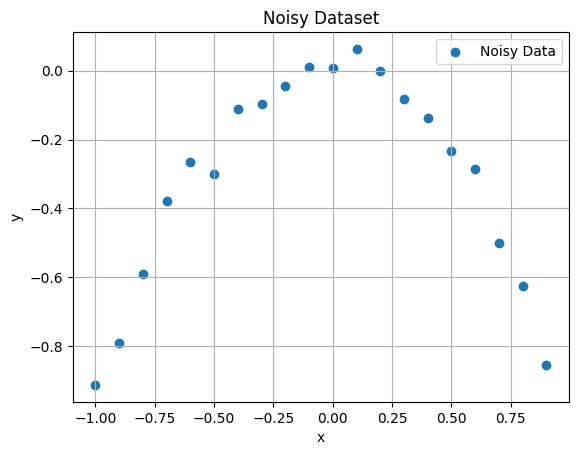

In [4]:
plt.scatter(x, y, label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Dataset')
plt.legend()
plt.grid(True)
plt.show()

4. Split the dataset into a training set (first 12 points) and a test set (last 8 points).



In [5]:
x_train, x_test = x[:12], x[12:]
y_train, y_test = y[:12], y[12:]

🌟 **Exercise 4:** Fitting Polynomial Models of Different Degrees

1. Define a function polynomial_fit that takes a degree as input and returns a polynomial that best fits the training data.

In [6]:
def polynomial_fit(degree):
    # Fit a polynomial of given degree to the training data
    coefficients = np.polyfit(x_train, y_train, degree)

    # Create a polynomial function using the fitted coefficients
    model = np.poly1d(coefficients)

    return model

2. Define another function plot_polyfit that plots the training set, test set, and the fitted polynomial curve for a given degree.

In [7]:
def plot_polyfit(degree):
    # Fit a polynomial model of the specified degree
    model = polynomial_fit(degree)

    # Generate fine x values for a smooth curve
    x_curve = np.linspace(min(x), max(x), 200) # table of 200 nbs
    y_curve = model(x_curve)

    # Plot the training and test data
    plt.scatter(x_train, y_train, label='Train Data', color='blue')
    plt.scatter(x_test, y_test, label='Test Data', color='orange')

    # Plot the polynomial curve
    plt.plot(x_curve, y_curve, label=f'Degree {degree} Fit', color='green')

    # Add labels and title
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # keep the axes size
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.2, 1.2)

    plt.show()


3. Use plot_polyfit to visualize the fit for polynomials of degree 1, 7, and 11.

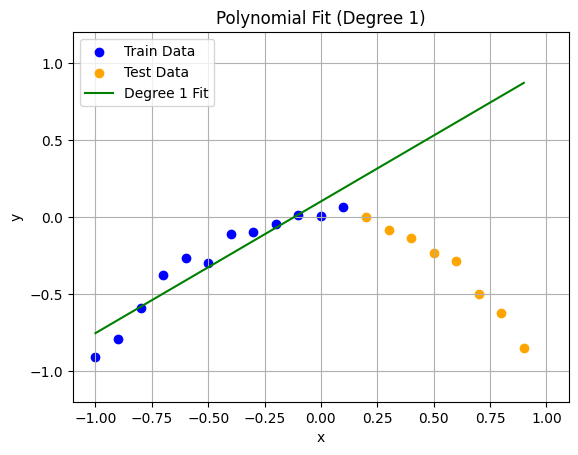

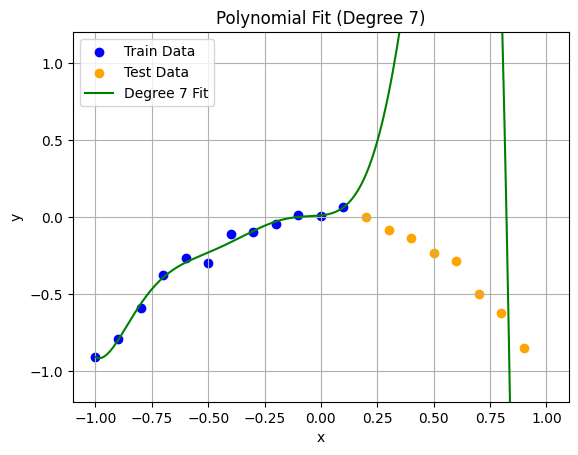

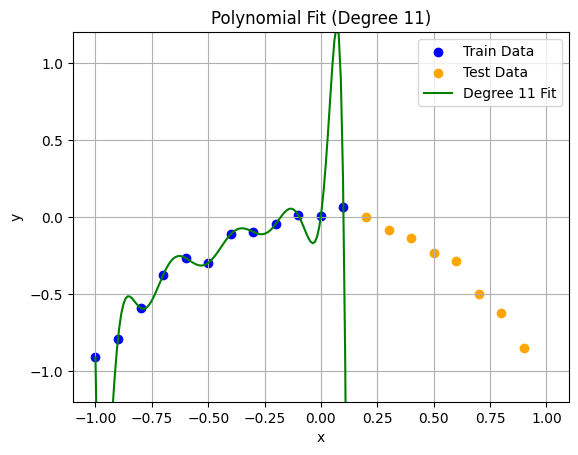

In [8]:
plot_polyfit(1)
plot_polyfit(7)
plot_polyfit(11)

4. Observe how the model behaves on the training and test sets as the degree of the polynomial increases.

As the degree of the polynomial increases, the model becomes more flexible and able to fit the training data more closely.

* With **degree 1**, the model underfits: it cannot capture the curve of the data. It performs poorly on both the training and test sets.

* With **degree 7**, the model fits the training set better, but it starts to show signs of overfitting — the curve rises unnaturally in the right part of the plot. This indicates that the model is starting to chase the noise in the data, which harms its ability to generalize well to the test set.

* With **degree 11**, overfitting becomes extreme: the curve explodes in some regions to perfectly match the training points, but the model fails to follow the true pattern and performs very poorly on the test data.

This demonstrates how increasing the degree reduces bias but increases variance, leading to overfitting if pushed too far.



🌟 **Exercise 5:** Cross-Validation to Find the Optimal Degree

1. Loop through polynomial degrees from 1 to 11.


Degree: 1


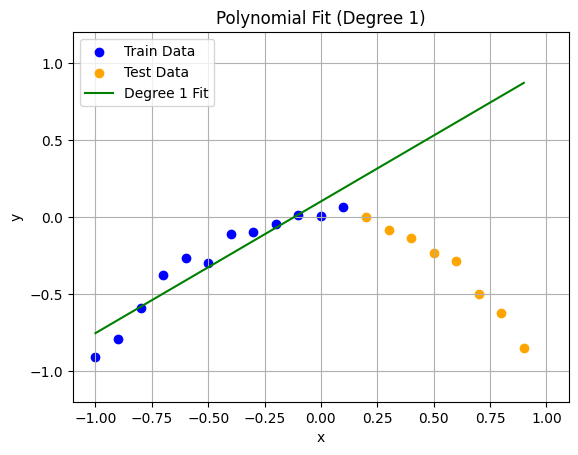


Degree: 2


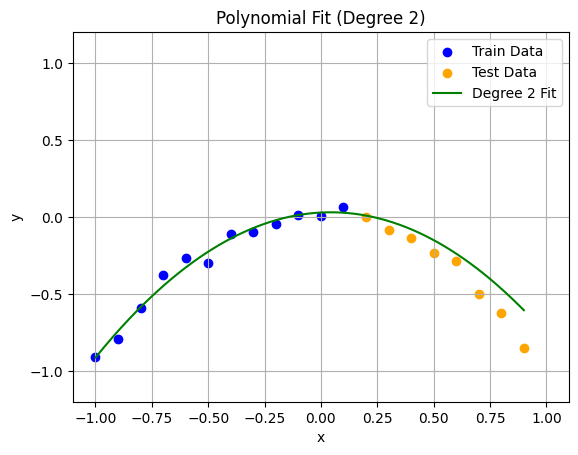


Degree: 3


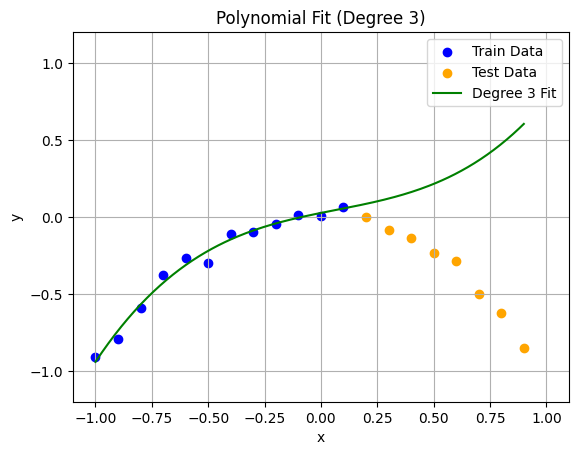


Degree: 4


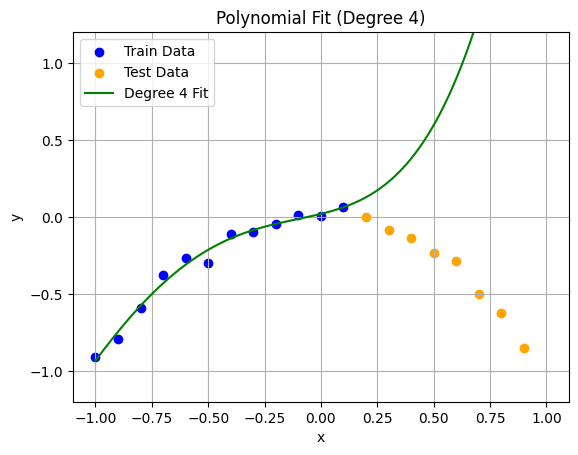


Degree: 5


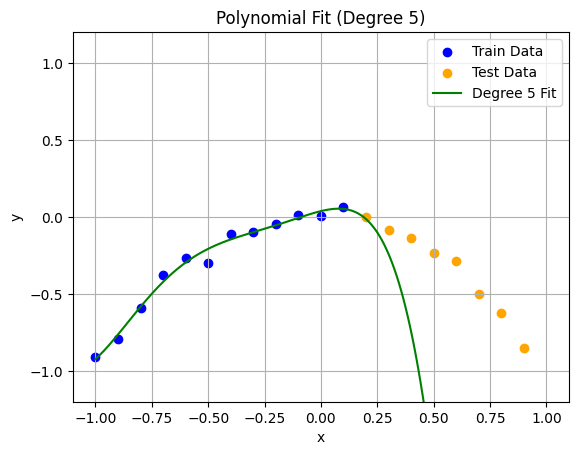


Degree: 6


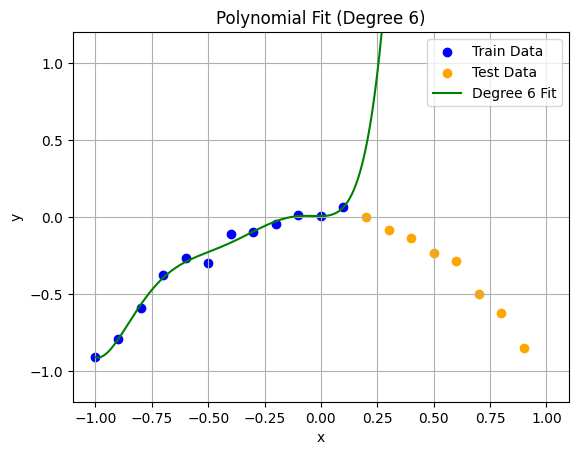


Degree: 7


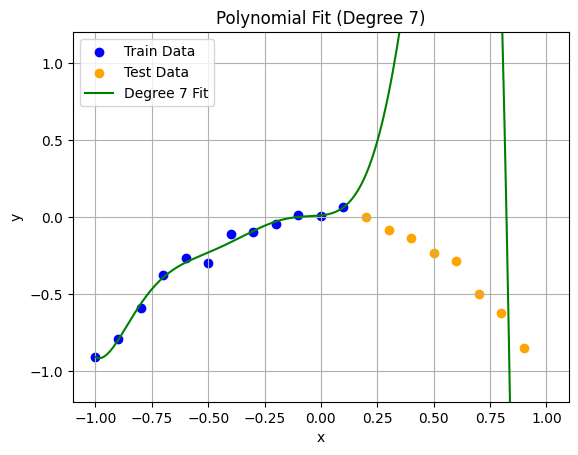


Degree: 8


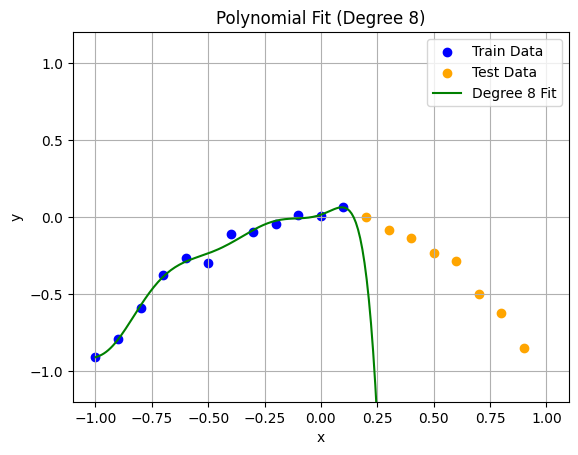


Degree: 9


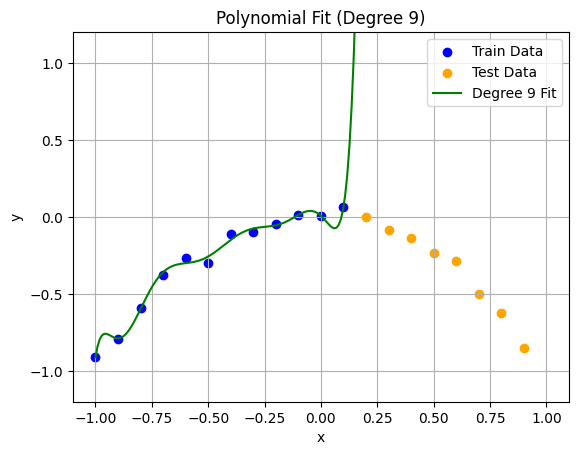


Degree: 10


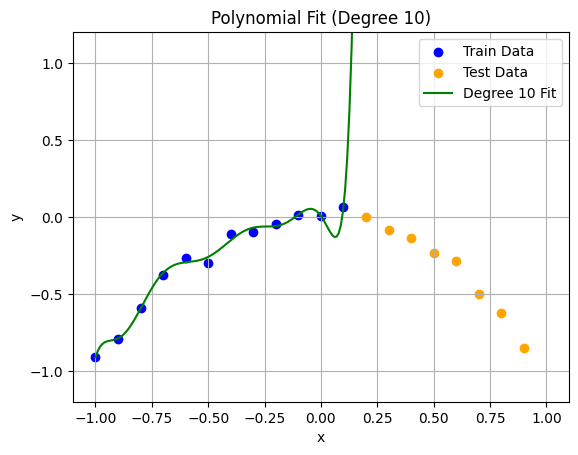


Degree: 11


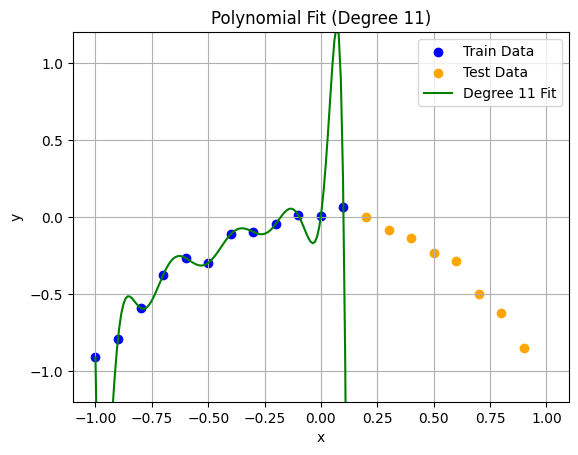

In [9]:
degrees = range(1, 12)

for degree in degrees:
    print(f"\nDegree: {degree}")
    plot_polyfit(degree)


2. For each degree, calculate the Root Mean Squared Error (RMSE) for both the training and test sets.
3. Store the results (degree, RMSE for training, RMSE for test) in a list.

In [10]:
from sklearn.metrics import mean_squared_error
import math

results = []

train_rmse = []
test_rmse = []

degrees = range(1, 12)

for degree in degrees:
    # Fit polynomial model
    model = polynomial_fit(degree)

    # Predictions on train and test
    y_pred_train = model(x_train)
    y_pred_test = model(x_test)

    # Compute RMSE
    rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))

    # Keep the results
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

    results.append((degree, rmse_train, rmse_test))

    print(f"Degree {degree} ➤ Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")


Degree 1 ➤ Train RMSE: 0.1002 | Test RMSE: 1.0241
Degree 2 ➤ Train RMSE: 0.0411 | Test RMSE: 0.1258
Degree 3 ➤ Train RMSE: 0.0373 | Test RMSE: 0.7697
Degree 4 ➤ Train RMSE: 0.0368 | Test RMSE: 1.7002
Degree 5 ➤ Train RMSE: 0.0349 | Test RMSE: 6.2069
Degree 6 ➤ Train RMSE: 0.0284 | Test RMSE: 58.8275
Degree 7 ➤ Train RMSE: 0.0281 | Test RMSE: 3.8190
Degree 8 ➤ Train RMSE: 0.0276 | Test RMSE: 523.8170
Degree 9 ➤ Train RMSE: 0.0209 | Test RMSE: 10165.8453
Degree 10 ➤ Train RMSE: 0.0206 | Test RMSE: 25560.4315
Degree 11 ➤ Train RMSE: 0.0000 | Test RMSE: 1014649.5230


As we increase the polynomial degree, we observe that the training RMSE steadily decreases; this means the model fits the training data more and more closely.

However, the test RMSE behaves very differently:

It reaches its minimum at degree 2, which corresponds to the true underlying model y=−x^2.

After that, the test RMSE increases sharply, especially for higher degrees, showing that the model starts to overfit — it learns the training data too precisely and fails to generalize.

This experiment highlights the classic trade-off between underfitting (too simple, like degree 1) and overfitting (too complex, like degree 11).
The optimal balance is achieved at degree 2, where both train and test RMSE are low.

4. Plot the RMSE values for both the training and test sets against the polynomial degree using a logarithmic scale for the y-axis.

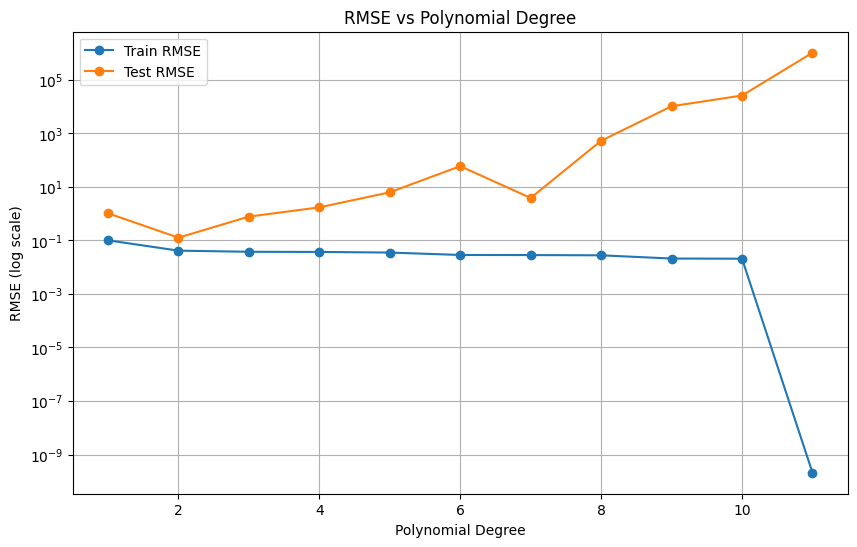

In [11]:
# Extract Data from result list
degrees = [r[0] for r in results]
train_rmse = [r[1] for r in results]
test_rmse = [r[2] for r in results]

# Curves
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, marker='o', label='Train RMSE')
plt.plot(degrees, test_rmse, marker='o', label='Test RMSE')
plt.yscale('log')  # Put Y axe on enlogarithmic scale
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE (log scale)')
plt.title('RMSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


5. Identify the degree that minimizes the RMSE on the test set and confirm that it corresponds to the true underlying model (( y = -x^2 )).

In [12]:
# Identify the degree with the minimum RMSE on the test set
min_test_rmse = min(test_rmse)
best_degree = degrees[test_rmse.index(min_test_rmse)]

print(f"The best polynomial degree is {best_degree} with a test RMSE of {min_test_rmse:.4f}")


The best polynomial degree is 2 with a test RMSE of 0.1258
